# COVID-19 Multiclassification using Convolutional Neural Networks Challenge for Data Science 2 Workshop

In this workshop, we will be trying to identify whether a patient has COVID, Normal, or Pnemonia based on their X-Ray's using Tensorflow implementing Convolutional Neural Networks.

By: Steven Zhang, Chenqian Xu, Xin He

## Explore the data

The dataset was sourced from Kaggle's COVID-19 Image Dataset provided by Pranav Raikote with the link [here](https://www.kaggle.com/pranavraikokte/covid19-image-dataset).
The training images you must use are in the **/Covid19-dataset/train** folder.

In [1]:
# Checking Versions of TensorFlow
!pip install --upgrade tensorflow

import tensorflow
from tensorflow import keras
# What is the relationship between tensorflow and keras?
print('Tensorflow version:', tensorflow.__version__)
print('Keras version:', keras.__version__)

Tensorflow version: 2.6.0
Keras version: 2.6.0


3 classes:
['Covid', 'Normal', 'Viral Pneumonia']


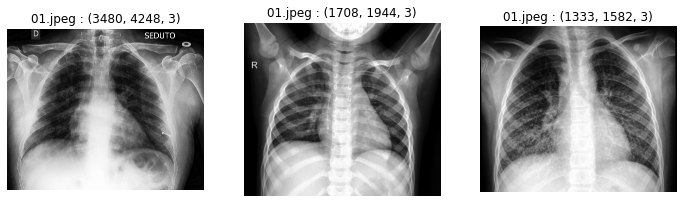

In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# The images are in the data/Covid19-dataset/ folder
data_path = 'data/Covid19-dataset/train'

# Get the class names
classes = os.listdir(data_path)
classes.sort()
print(len(classes), 'classes:')
print(classes)

# Show the first image in each folder
fig = plt.figure(figsize=(12, 12))
i = 0
for sub_dir in os.listdir(data_path):
    i+=1
    img_file = os.listdir(os.path.join(data_path,sub_dir))[0]
    img_path = os.path.join(data_path, sub_dir, img_file)
    img = mpimg.imread(img_path)
    img_shape = np.array(img).shape
    a=fig.add_subplot(1, len(classes),i)
    a.axis('off')
    imgplot = plt.imshow(img)
    a.set_title(img_file + ' : ' + str(img_shape))
plt.show()

## Prepare the data

In [3]:
# Prepare Data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
img_size = (200, 200)
batch_size = 25
print('Getting Data...')
datagen = ImageDataGenerator(rescale = 1./255, # Normalize Pixel values
                             validation_split = 0.3) # Hold Back 30% images for training
print('Preparing to train the data...')
train_generator = datagen.flow_from_directory(
    data_path,
    target_size = img_size,
    batch_size = batch_size,
    class_mode = 'categorical',
    subset = 'training'
)
print('Preparing Valid Data')
validation_generator = datagen.flow_from_directory(
    data_path,
    target_size = img_size,
    batch_size = batch_size,
    class_mode = 'categorical',
    subset = 'validation'
)
classnames = list(train_generator.class_indices.keys())
print('Data Generators Ready')
print(classnames)

Getting Data...
Preparing to train the data...
Found 219 images belonging to 3 classes.
Preparing Valid Data
Found 93 images belonging to 3 classes.
Data Generators Ready
['Covid', 'Normal', 'Viral Pneumonia']


## Define the CNN

In [4]:
# Define the Convolutional Neural Network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
# Model as sequence of Layers
model = Sequential()
print(train_generator.image_shape)
# Input layer accepts image and applies Convolution, 32 6x6 filters and a rectified Linear Unit Activation Function
model.add(Conv2D(32, (6, 6), input_shape = train_generator.image_shape, activation = 'relu'))
# Max Pooling Layer with 2x2 Patch
model.add(MaxPooling2D(pool_size = (2, 2)))
# Adding another set of Convolution and MaxPooling Layers
model.add(Conv2D(32, (6, 6), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(32, (6, 6), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
# Dropout Layer that randoms drops some nodes to reduce interdependencies/overfitting
model.add(Dropout(0.2))
# Flatten feature maps
model.add(Flatten())
# Generate fully connected output later with predicted probabilities for each class
# Softmax ensures all probabilities sum to 1
model.add(Dense(train_generator.num_classes, activation = 'softmax'))
# Compile model for categorical multi classfication
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])
print(model.summary()) 

(200, 200, 3)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 195, 195, 32)      3488      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 97, 97, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 92, 92, 32)        36896     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 46, 46, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 41, 41, 32)        36896     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 20, 20, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 20, 20

## Train the Model

In [5]:
# Your Code to train a CNN model...
num_epochs = 15
history = model.fit(
    train_generator,
    #steps_per_epoch = train_generator.samples,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // batch_size,
    epochs = num_epochs
)

Epoch 1/15
8/8 [==============================] - 15s 2s/step - loss: 1.0901 - accuracy: 0.4021 - val_loss: 1.0087 - val_accuracy: 0.6667
Epoch 2/15
8/8 [==============================] - 13s 2s/step - loss: 0.8157 - accuracy: 0.7680 - val_loss: 0.6048 - val_accuracy: 0.7733
Epoch 3/15
8/8 [==============================] - 13s 2s/step - loss: 0.4328 - accuracy: 0.8093 - val_loss: 0.4981 - val_accuracy: 0.7333
Epoch 4/15
8/8 [==============================] - 13s 2s/step - loss: 0.2309 - accuracy: 0.9124 - val_loss: 0.4323 - val_accuracy: 0.8133
Epoch 5/15
8/8 [==============================] - 13s 2s/step - loss: 0.2116 - accuracy: 0.9021 - val_loss: 0.4144 - val_accuracy: 0.8400
Epoch 6/15
8/8 [==============================] - 13s 2s/step - loss: 0.2304 - accuracy: 0.9072 - val_loss: 0.4213 - val_accuracy: 0.8133
Epoch 7/15
8/8 [==============================] - 13s 2s/step - loss: 0.2111 - accuracy: 0.9124 - val_loss: 0.3799 - val_accuracy: 0.8267
Epoch 8/15
8/8 [==================

## View Loss History

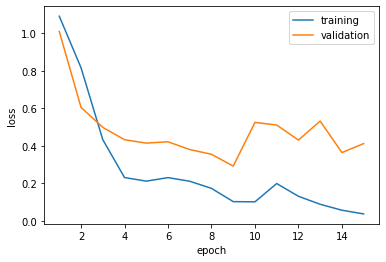

In [6]:
# Graphing Loss Graph
epoch_nums = range(1, num_epochs + 1)
training_loss = history.history["loss"]
validation_loss = history.history["val_loss"]
plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc = 'upper right')
plt.show()

## Evaluate Model Performance

Generating Predictions...


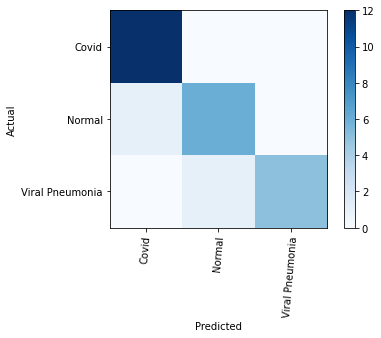

In [7]:
# Evaluate Model Performance by Confusion Matrix
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

print('Generating Predictions...')
# Get image and label arrays
x_test = validation_generator[0][0]
y_test = validation_generator[0][1]
# Predicting
class_probabilities = model.predict(x_test)
# Setting the Highest Probability to be the class
predictions = np.argmax(class_probabilities, axis = 1)
# Actual Labels are hot encoded [0, 1, 0]
true_labels = np.argmax(y_test, axis = 1)
# Confusion matrix
cm = confusion_matrix(predictions, true_labels)
plt.imshow(cm, interpolation = "nearest", cmap = plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(classnames))
plt.xticks(tick_marks, classnames, rotation = 85)
plt.yticks(tick_marks, classnames)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Save your model

Saving model's trained weights.

In [8]:
# Code to save your model
modelFileName = 'data/covid_classifier.h5'
model.save(modelFileName)
del model
print('Model saved as', modelFileName)

Model saved as data/covid_classifier.h5


## Use the trained model

Now that we've trained your model, modify the following code as necessary to use it to predict the classes of the provided test images.

Covid [[9.9998009e-01 1.8457116e-05 1.4249250e-06]]
Covid [[0.9925645  0.00482363 0.00261182]]
Covid [[9.9992526e-01 1.0797991e-06 7.3703988e-05]]
Normal [[4.0038888e-04 8.6541885e-01 1.3418075e-01]]
Normal [[9.0455596e-06 9.9705827e-01 2.9327439e-03]]
Normal [[1.6662467e-04 9.9521768e-01 4.6157306e-03]]
Viral Pneumonia [[0.03113519 0.3035868  0.6652781 ]]
Viral Pneumonia [[2.8319002e-05 3.3651323e-03 9.9660659e-01]]
Viral Pneumonia [[5.1122533e-09 7.2841627e-05 9.9992716e-01]]


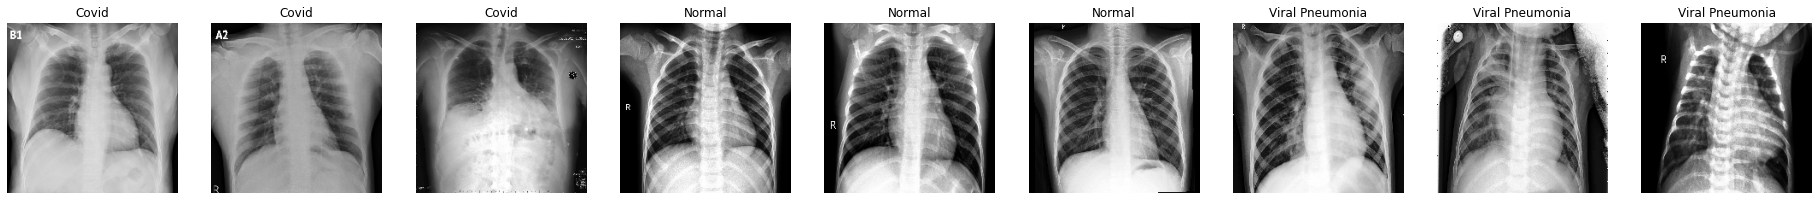

In [9]:
from tensorflow.keras import models
from keras.preprocessing import image
import numpy as np
import os
%matplotlib inline

# Function to predict the class of an image
def predict_image(classifier, image):
    #from tensorflow import convert_to_tensor
    imgfeatures = image
    # Formatting new data to be like training data generator(floats and normalizing the values)
    imgfeatures = imgfeatures.astype('float32')
    imgfeatures /= 255
    # Use the model to predict the image class
    class_probabilities = classifier.predict(imgfeatures)
    # Find the class predictions with the highest predicted probability
    index = int(np.argmax(class_probabilities, axis=1)[0])
    return index

# Function to predict the class probabilities
def predict_image_probability(classifier, image):
    #from tensorflow import convert_to_tensor
    imgfeatures = image
    # Formatting new data to be like training data generator(floats and normalizing the values)
    imgfeatures = imgfeatures.astype('float32')
    imgfeatures /= 255
    # Use the model to predict the image class
    class_probabilities = classifier.predict(imgfeatures)
    return class_probabilities


# Load your model
model = models.load_model(modelFileName) # loads the saved model

# The images are in the data/shapes folder
test_data_path = 'data/Covid19-dataset/test'

# Show the test images with predictions
fig = plt.figure(figsize=(36, 12))
i = 0
for img_file in os.listdir(test_data_path):
    i+=1
    img_path = os.path.join(test_data_path, img_file)
    #img = mpimg.imread(img_path)
    img = image.load_img(img_path, target_size = (200, 200))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis = 0)
    # Get the image class prediction
    index = predict_image(model, np.array(x))
    predicted_probabilities = predict_image_probability(model, np.array(x))
    print(classes[index], predicted_probabilities)
    a=fig.add_subplot(1, len(classes) + 7 ,i)
    a.axis('off')
    imgplot = plt.imshow(img)
    a.set_title(classes[index])
plt.show()